In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd_res = pd.read_csv('out/results/parse_res.prof')

BASE_MACHINE_NAME = 'kv3'

def plot_hist(category_name, yscale, xmargin, tick_rotation, xlabel, ylabel):
    category = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith(category_name))]

    # recreate a new view with benchmarks with all machines
    category_df = pd.DataFrame(data=category['benchmark'], columns=['benchmark'])
    machines = category['machine'].unique()

    for m in machines:
        category_df[m] = category[category['machine'] == m]['result']

    category_df[BASE_MACHINE_NAME] = category[category['machine'] == machines[0]]['base_result']
    category_df = category_df.reset_index(drop=True)

    # start to draw figrue
    all_machines = machines.tolist() + [BASE_MACHINE_NAME]
    names = category_df['benchmark'].tolist()
    values  = [category_df[m].tolist() for m in all_machines]
    colors = cm.gist_rainbow(np.linspace(0, 1, 5))

    pos = np.arange(len(values[0]))
    width = 1. / (5 + len(values))

    bars = []
    fig, ax = plt.subplots()
    for idx, (v, color) in enumerate(zip(values, colors)):
        bars.append(ax.bar(left=pos + idx * width, height=v, width=width, alpha=0.7, color=color))

    ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
    ax.set_yscale(yscale)
    ax.margins(xmargin, None)
    ax.set_xticks(pos + width)
    ax.set_xticklabels(names, rotation=tick_rotation)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return category_df

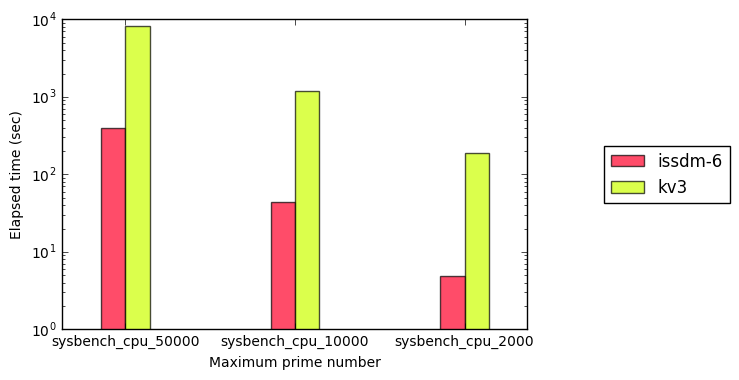

,benchmark,issdm-6,kv3
0,sysbench_cpu_50000,396.4112,8316.7771
1,sysbench_cpu_10000,43.3559,1201.1142
2,sysbench_cpu_2000,4.8234,190.0134


In [2]:
sysbench_cpu_df = plot_hist(category_name='sysbench_cpu', yscale='log',
                            xmargin=0.1 , tick_rotation='horizontal',
                            xlabel='Maximum prime number', ylabel='Elapsed time (sec)')
sysbench_cpu_df

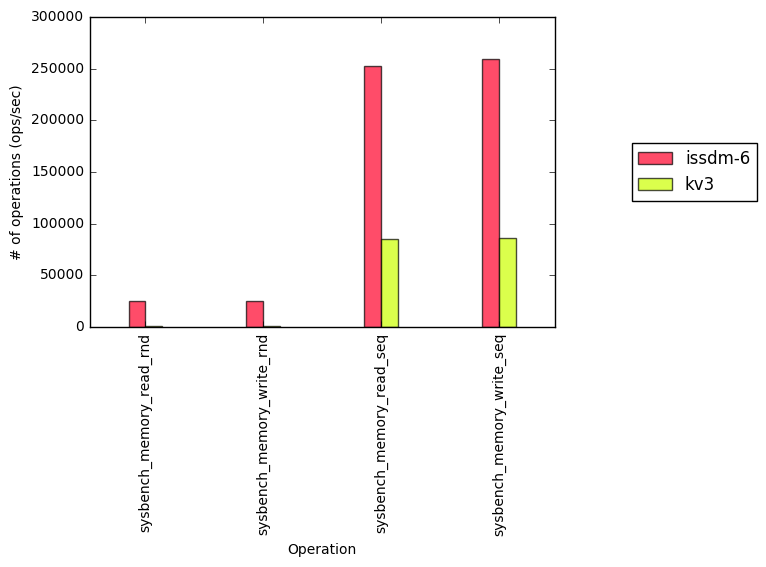

,benchmark,issdm-6,kv3
0,sysbench_memory_read_rnd,25635.77,1118.40
1,sysbench_memory_write_rnd,25161.86,1120.00
2,sysbench_memory_read_seq,252215.59,85281.88
3,sysbench_memory_write_seq,259629.77,85875.72


In [3]:
sysbench_memory_df = plot_hist(category_name='sysbench_memory', yscale='linear',
                               xmargin=0.1 , tick_rotation='vertical',
                               xlabel='Operation', ylabel='# of operations (ops/sec)')
sysbench_memory_df

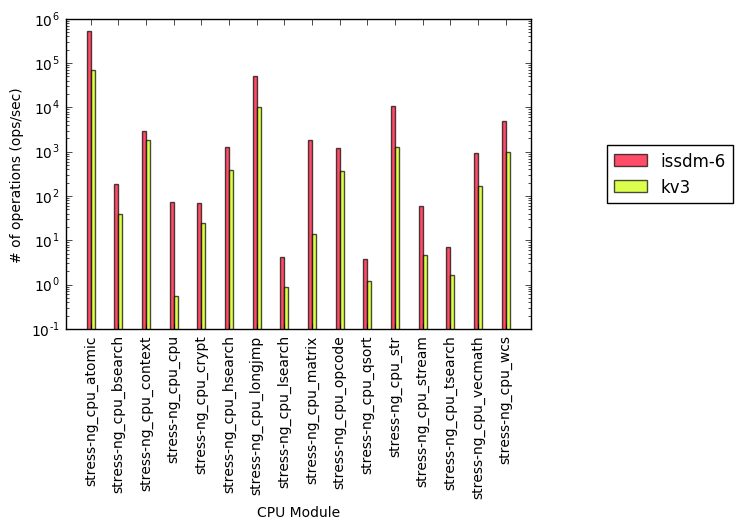

,benchmark,issdm-6,kv3
0,stress-ng_cpu_atomic,526010.582768,69422.195295
1,stress-ng_cpu_bsearch,190.213183,39.296475
2,stress-ng_cpu_context,2943.286650,1871.540427
3,stress-ng_cpu_cpu,72.701074,0.546996
4,stress-ng_cpu_crypt,69.353298,24.445935
5,stress-ng_cpu_hsearch,1251.284964,382.903122
6,stress-ng_cpu_longjmp,50095.215937,9991.356842
7,stress-ng_cpu_lsearch,4.300858,0.900031
8,stress-ng_cpu_matrix,1839.212148,13.800465
9,stress-ng_cpu_opcode,1242.644571,364.400400


In [4]:
stress_ng_cpu_df = plot_hist(category_name='stress-ng_cpu', yscale='log',
                             xmargin=0.05 , tick_rotation='vertical',
                             xlabel='CPU Module', ylabel='# of operations (ops/sec)')
stress_ng_cpu_df

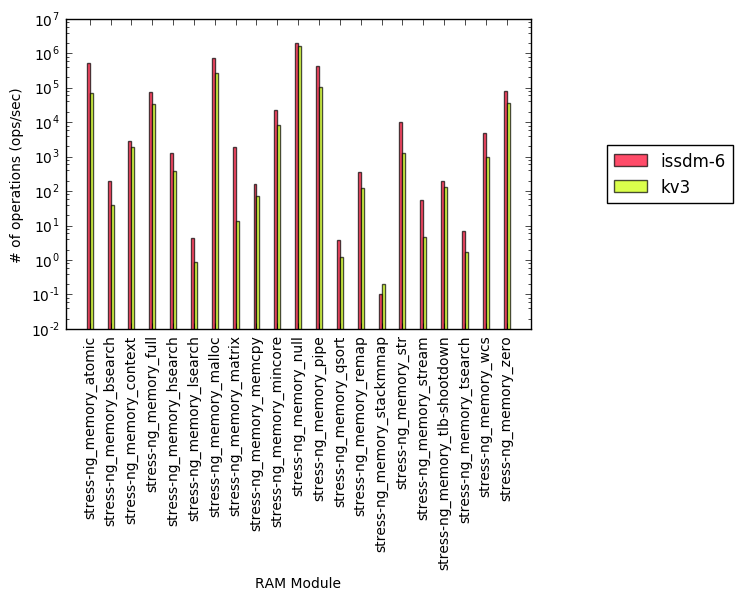

,benchmark,issdm-6,kv3
0,stress-ng_memory_atomic,5.258340e+05,6.959862e+04
1,stress-ng_memory_bsearch,1.917626e+02,3.931073e+01
2,stress-ng_memory_context,2.941358e+03,1.886341e+03
3,stress-ng_memory_full,7.357224e+04,3.352275e+04
4,stress-ng_memory_hsearch,1.248893e+03,3.809976e+02
5,stress-ng_memory_lsearch,4.300935e+00,9.000210e-01
6,stress-ng_memory_malloc,7.204272e+05,2.774019e+05
7,stress-ng_memory_matrix,1.844206e+03,1.380046e+01
8,stress-ng_memory_memcpy,1.650099e+02,7.148579e+01
9,stress-ng_memory_mincore,2.218749e+04,8.149092e+03


In [5]:
stress_ng_memory_df = plot_hist(category_name='stress-ng_memory', yscale='log',
                                xmargin=0.05 , tick_rotation='vertical',
                                xlabel='RAM Module', ylabel='# of operations (ops/sec)')
stress_ng_memory_df

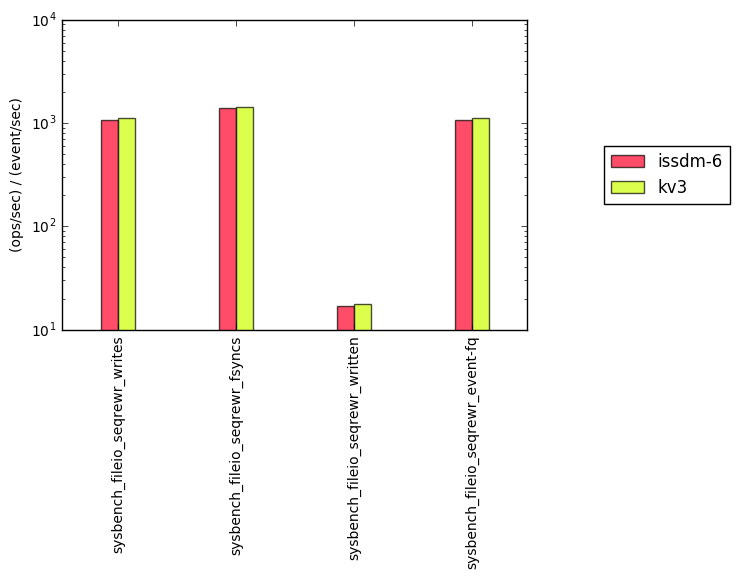

,benchmark,issdm-6,kv3
0,sysbench_fileio_seqrewr_writes,1080.1800,1124.6700
1,sysbench_fileio_seqrewr_fsyncs,1382.6300,1439.5700
2,sysbench_fileio_seqrewr_written,16.8800,17.5700
3,sysbench_fileio_seqrewr_event-fq,1080.1819,1124.6696


In [6]:
sysbench_fileio_df = plot_hist(category_name='sysbench_fileio', yscale='log',
                               xmargin=0.1 , tick_rotation='vertical',
                               xlabel='', ylabel='(ops/sec) / (event/sec)')
sysbench_fileio_df

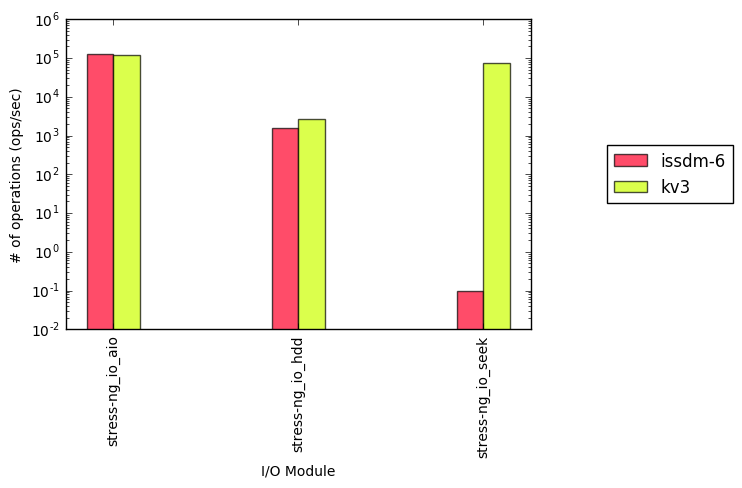

,benchmark,issdm-6,kv3
0,stress-ng_io_aio,125560.601509,120586.597859
1,stress-ng_io_hdd,1517.260705,2700.304446
2,stress-ng_io_seek,0.099935,75622.045153


In [7]:
stress_ng_io_df = plot_hist(category_name='stress-ng_io', yscale='log',
                            xmargin=0.05 , tick_rotation='vertical',
                            xlabel='I/O Module', ylabel='# of operations (ops/sec)')
stress_ng_io_df

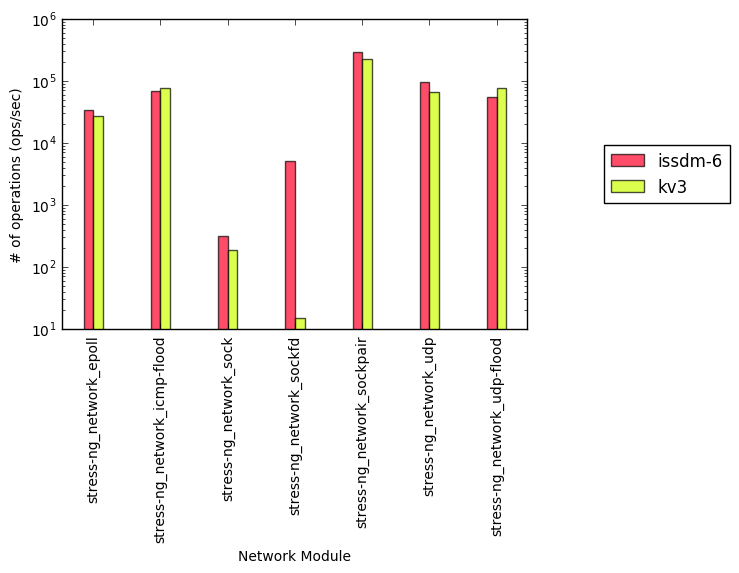

,benchmark,issdm-6,kv3
0,stress-ng_network_epoll,34191.232682,26651.436785
1,stress-ng_network_icmp-flood,69247.590019,76265.602000
2,stress-ng_network_sock,317.186932,185.435354
3,stress-ng_network_sockfd,5008.170525,15.056720
4,stress-ng_network_sockpair,296122.034353,225616.587904
5,stress-ng_network_udp,97556.862828,65371.957611
6,stress-ng_network_udp-flood,55434.241171,75767.186295


In [8]:
stress_ng_network_df = plot_hist(category_name='stress-ng_network', yscale='log',
                                 xmargin=0.05 , tick_rotation='vertical',
                                 xlabel='Network Module', ylabel='# of operations (ops/sec)')
stress_ng_network_df